INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Rastrigin', 'problem_size': 100, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': {'type': 'global', 'start': 10, 'max': 30}, 'population size': 5, 'offspring size': 15, 'delete agents': True}
INFO:root:Socjo started
Progress:   0%|          | 1080005/1000000000 [09:00<134:50:48, 2057.73it/s]INFO:root:comparison finished in 8.623743836085001
INFO:root:best socjo 0.006535934483322237 best single 15.96955834549843


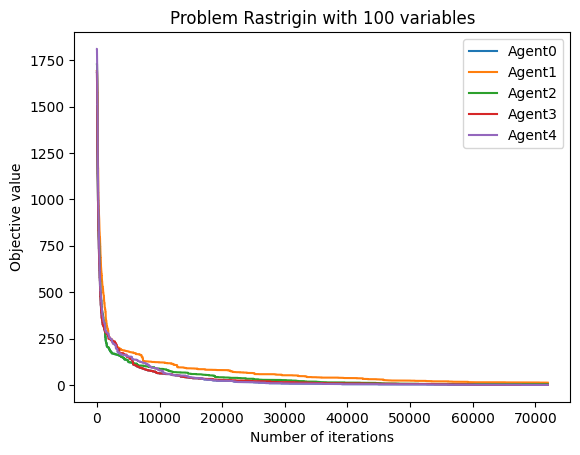

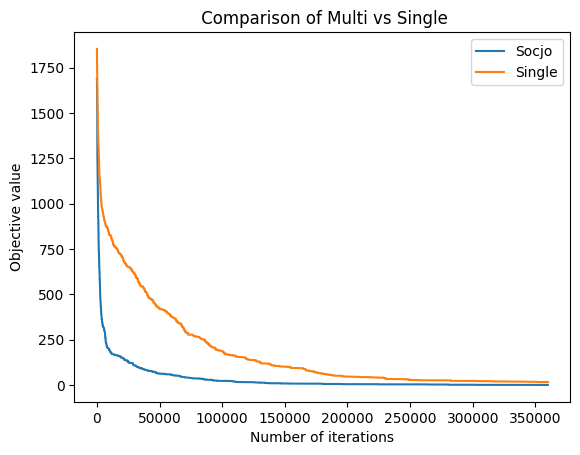

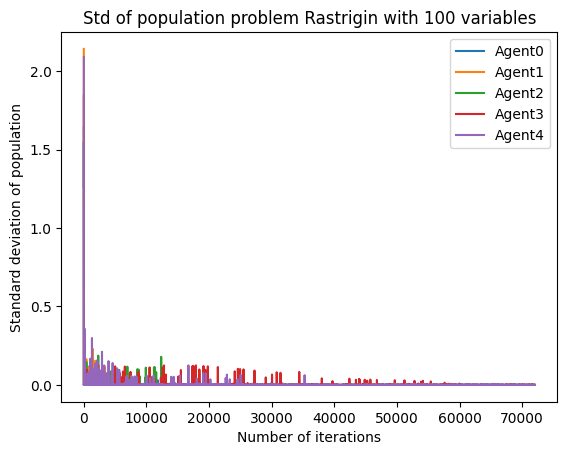

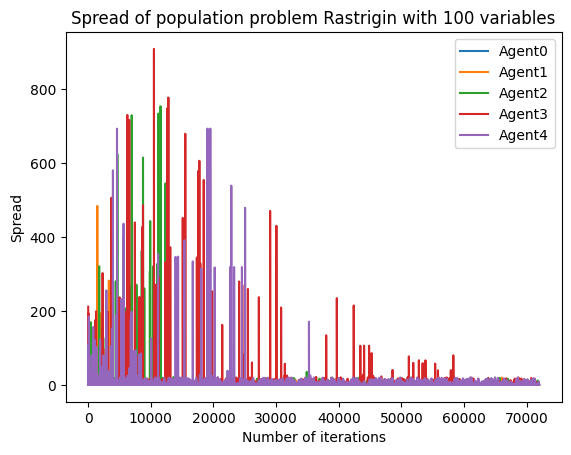

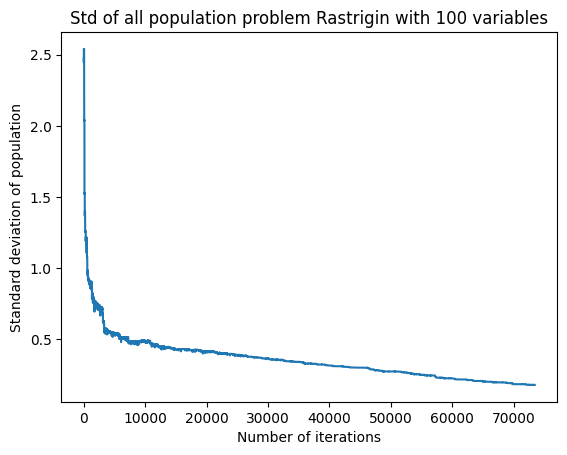

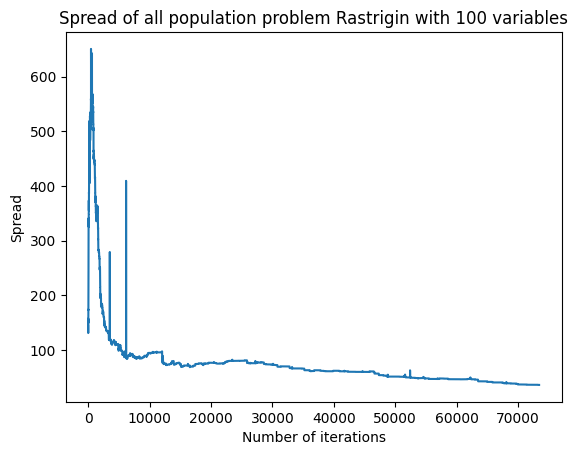

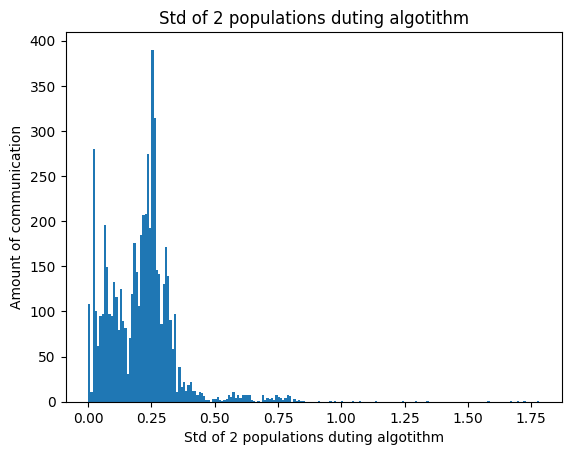

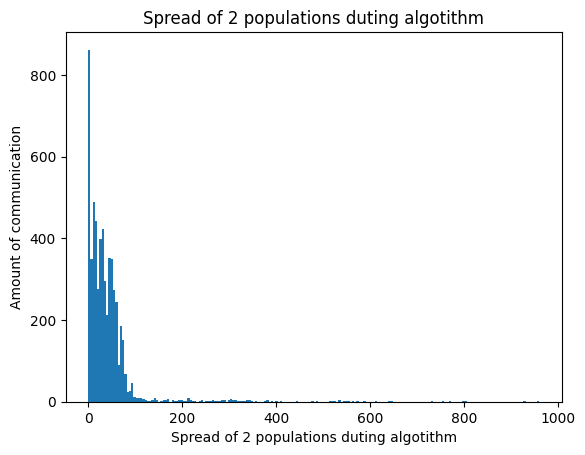

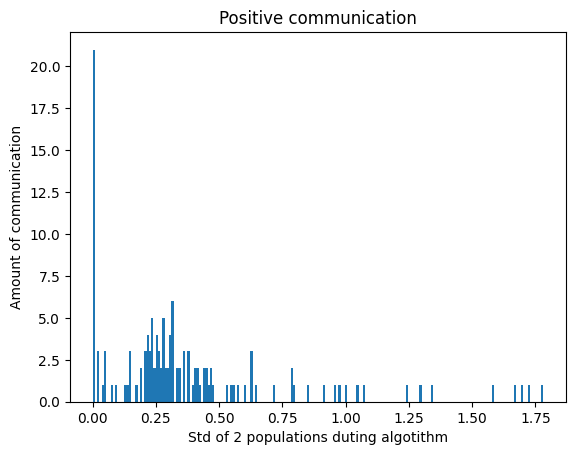

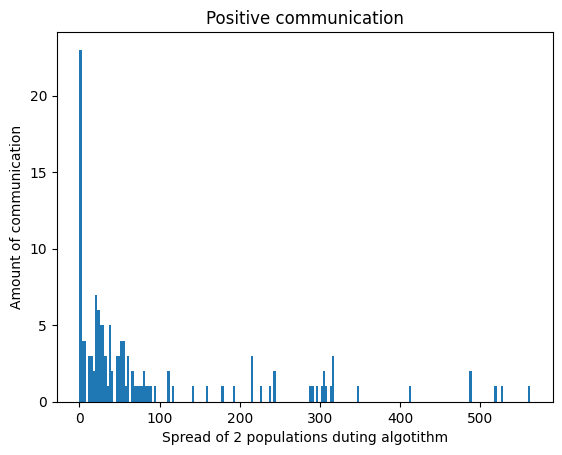

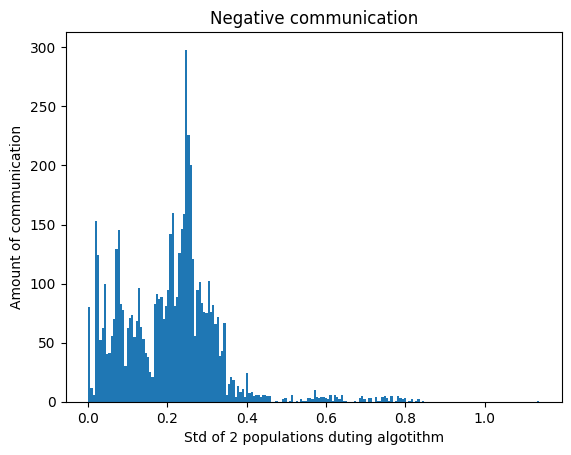

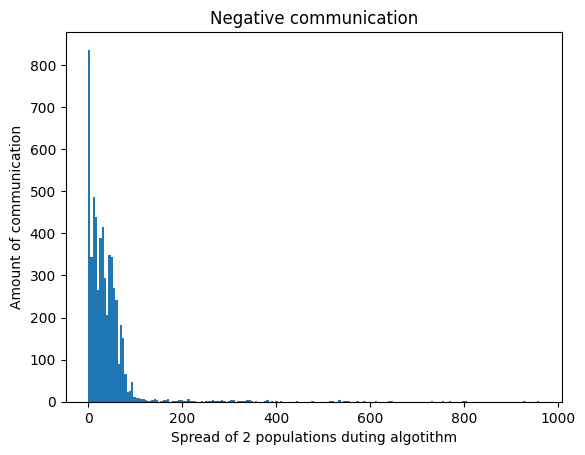

INFO:root:plotting finished in 0.06992092132568359
INFO:root:Run 0 out of 3
Progress:   0%|          | 1080005/1000000000 [26:32<133:57:37, 2071.34it/s]INFO:root:comparison finished in 8.427327167987823
INFO:root:best socjo 0.0010489860643971838 best single 2.12743213775636


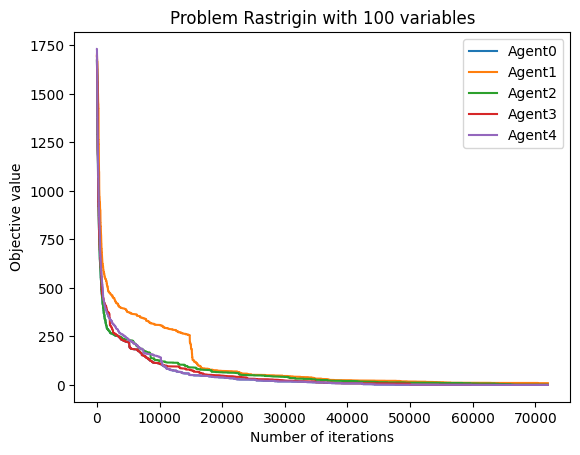

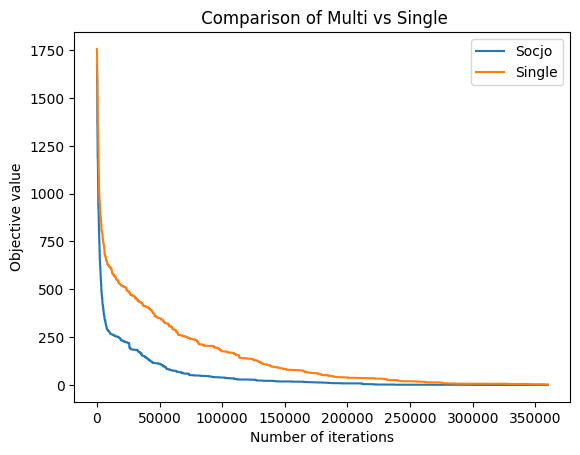

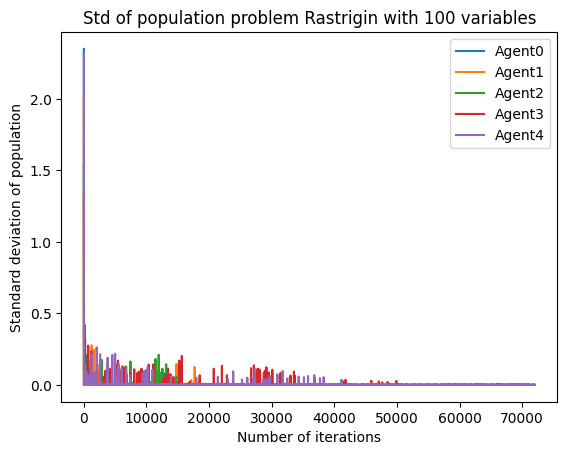

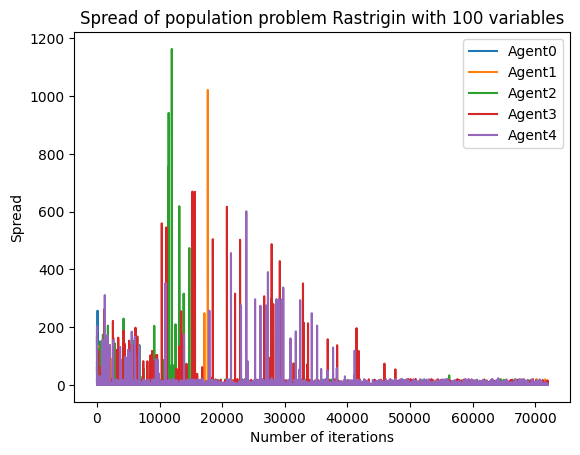

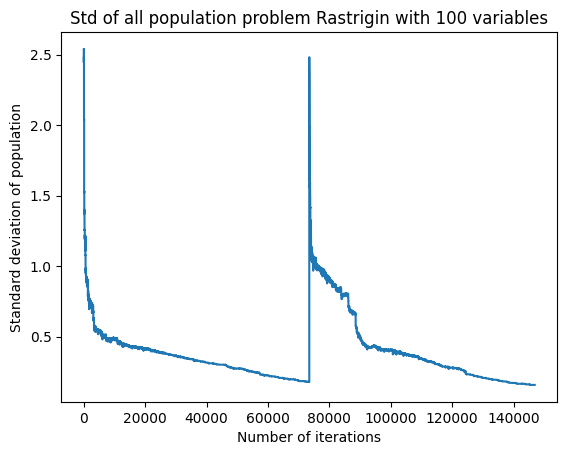

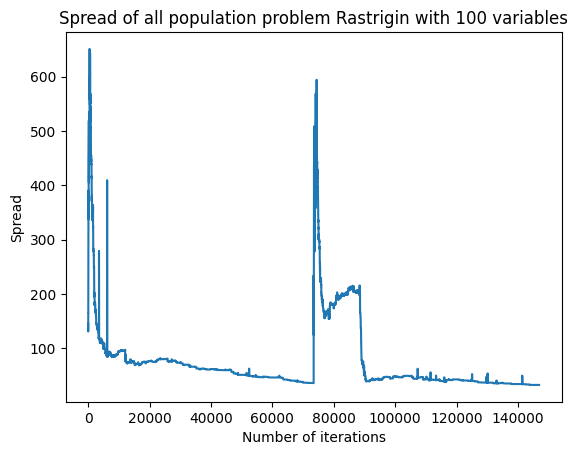

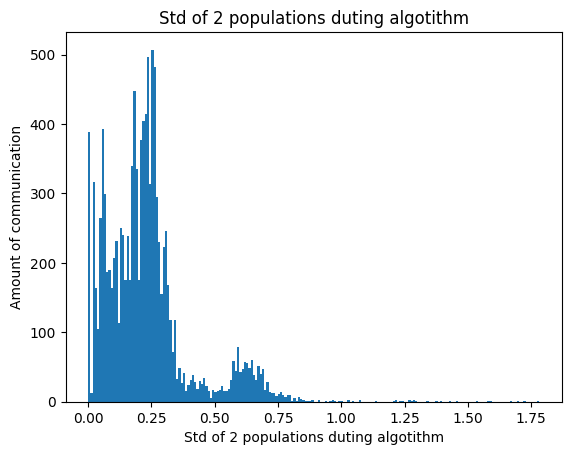

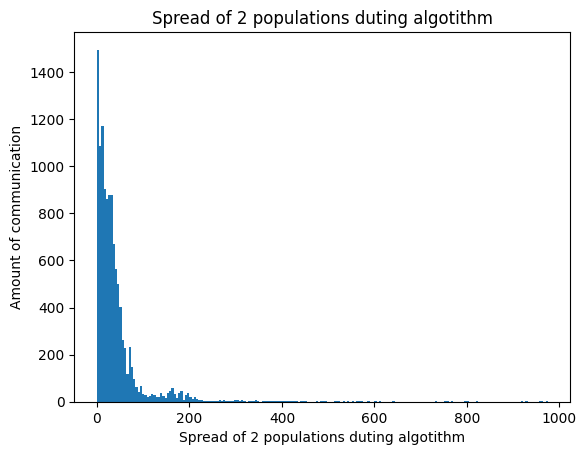

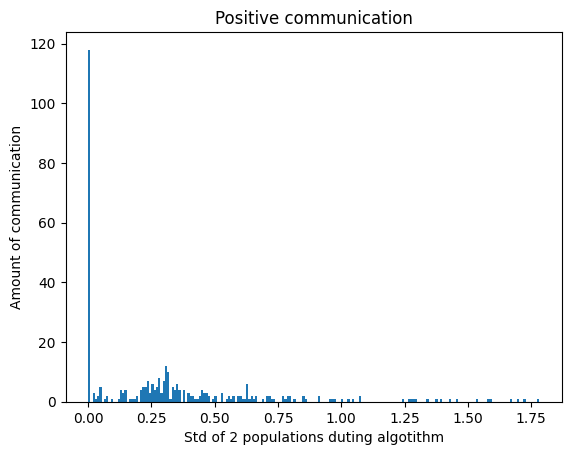

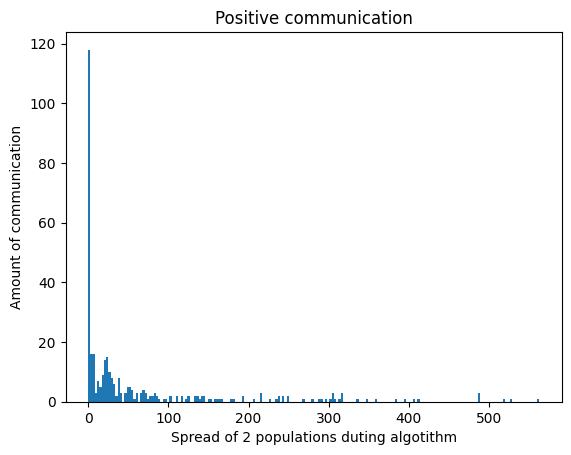

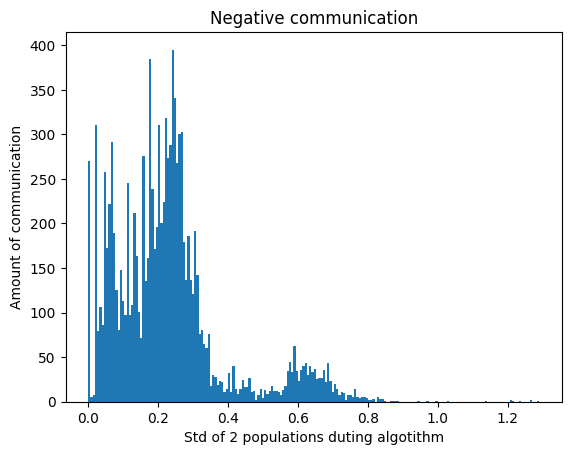

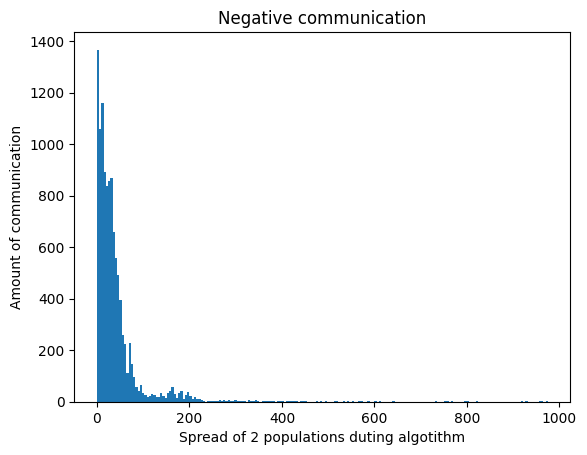

INFO:root:plotting finished in 0.07832562526067098
INFO:root:Run 1 out of 3
Progress:   0%|          | 1080005/1000000000 [43:54<134:18:19, 2066.02it/s]INFO:root:comparison finished in 8.446434287230174
INFO:root:best socjo 0.002725965211586967 best single 3.991219085273835


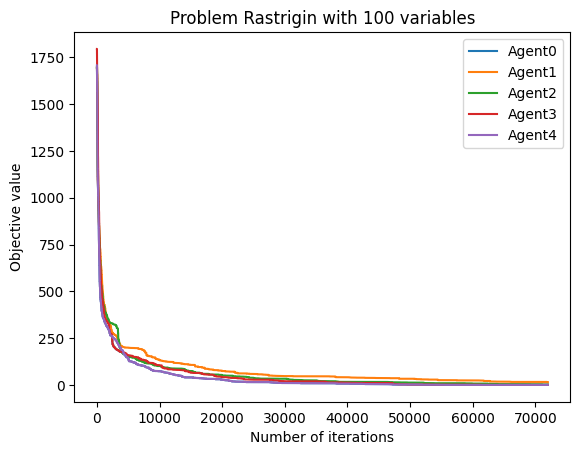

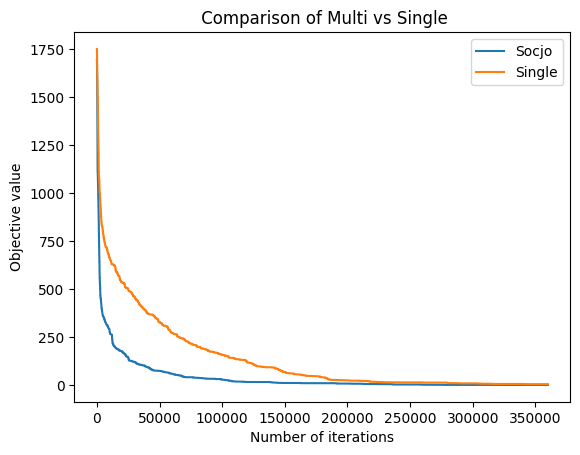

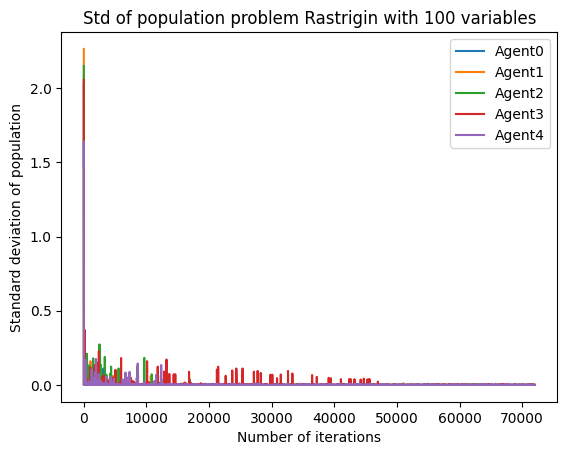

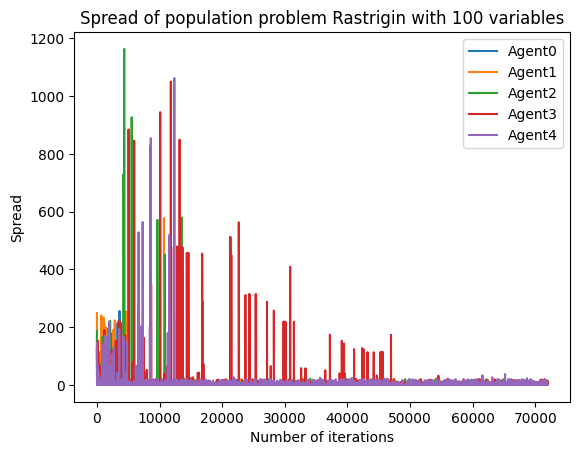

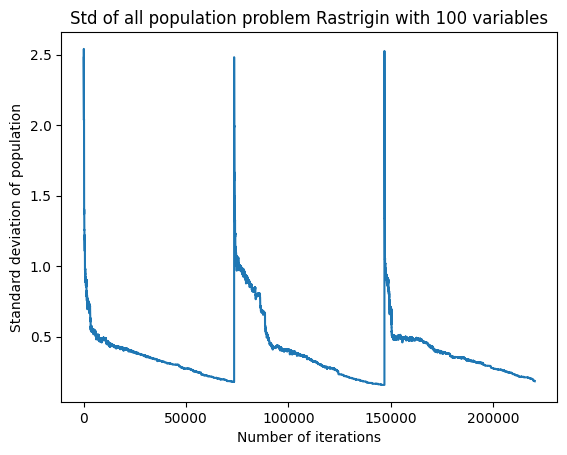

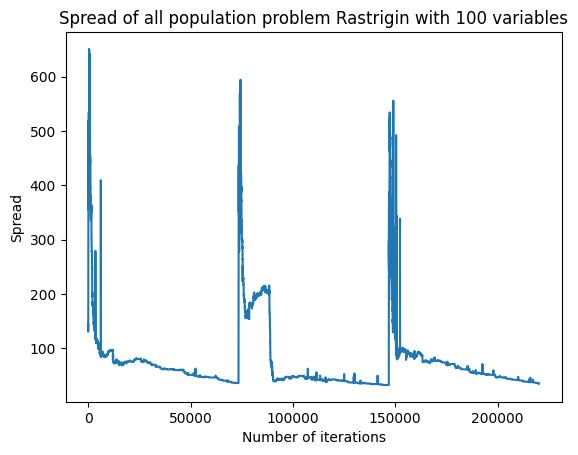

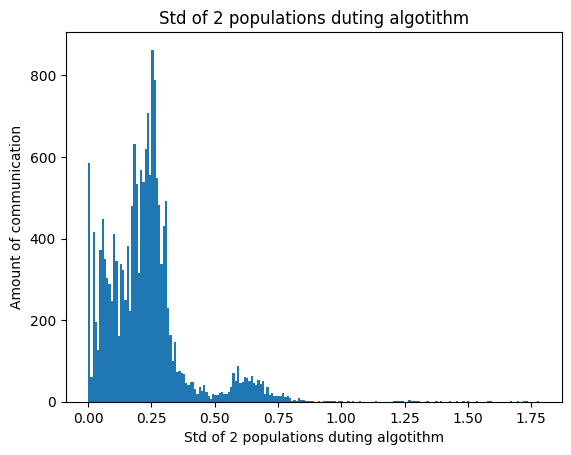

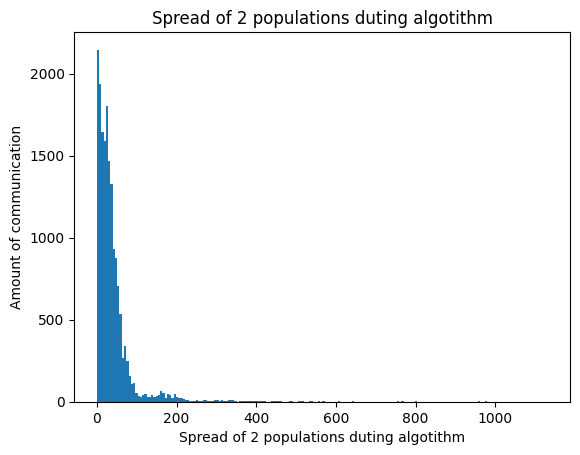

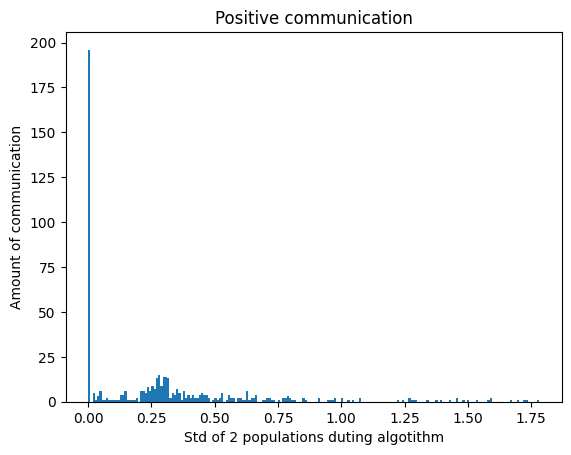

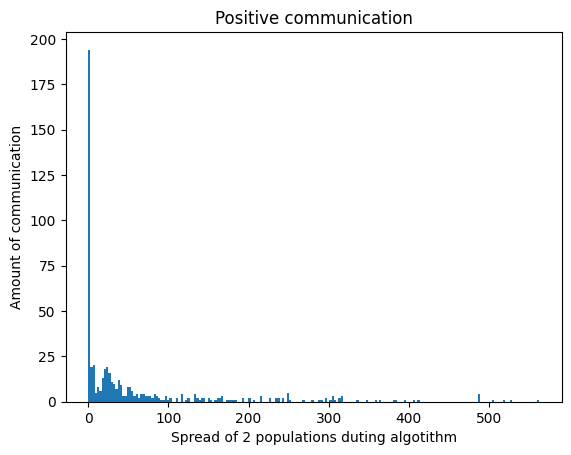

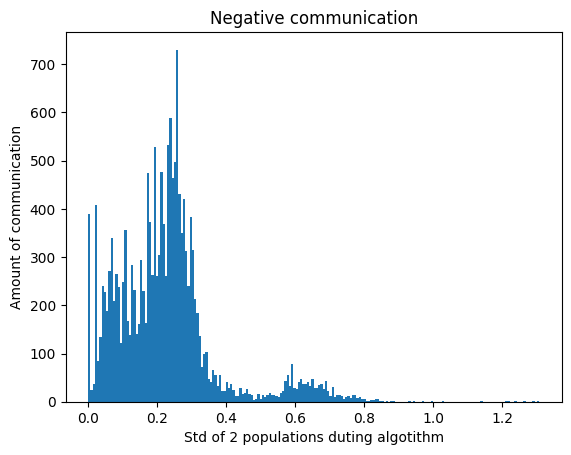

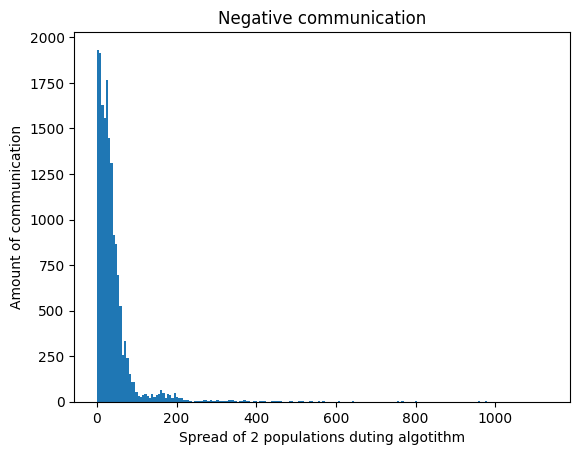

INFO:root:plotting finished in 0.07326528628667196
INFO:root:Run 2 out of 3


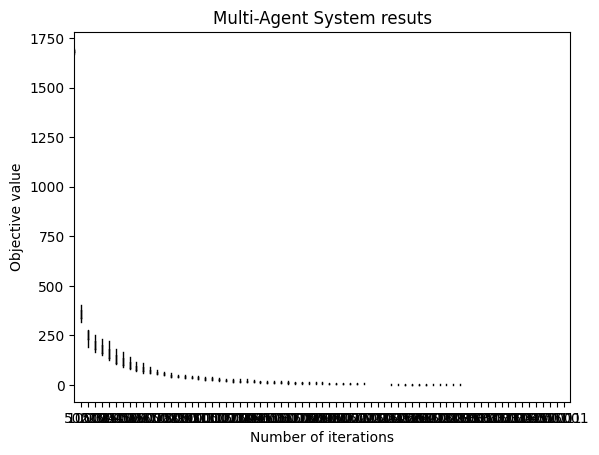

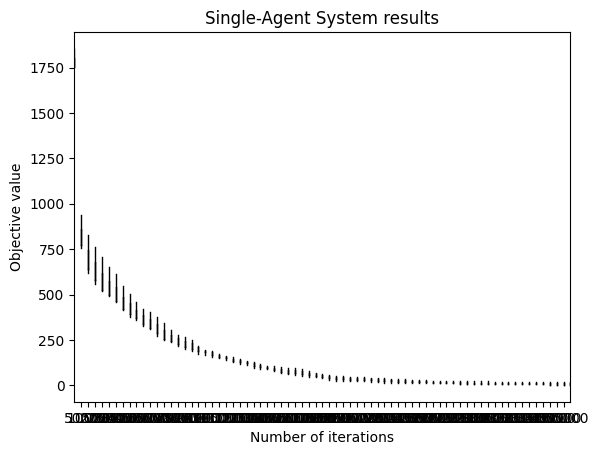

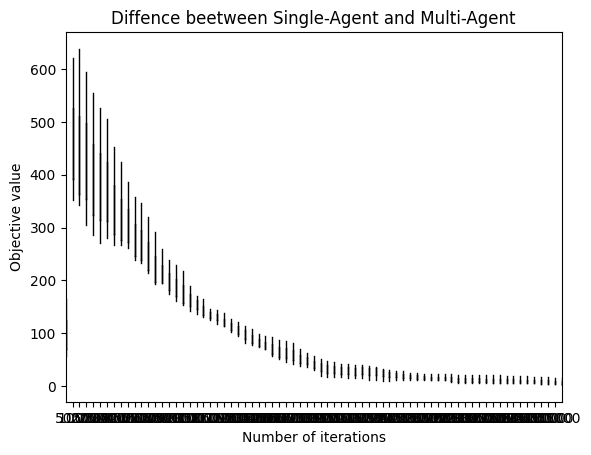

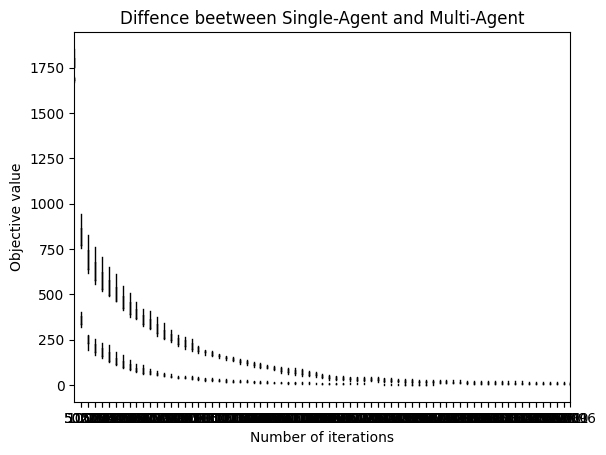

In [1]:
import logging
from settings.settings import Settings
from time import time
from runners.bulilders.statistic_builder import StatisticRunnerBuilder
import os
time1 =  time()
Statistic_runner_list = []
prefix = os.path.join("run_configs", "problem")
for idx, config in enumerate(["config_R.json"]):
    with open(os.path.join(prefix,config),"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    iterations = config.problem.number_of_variables *450 * (8-(idx*2)) 
    statisticRunnerBuilder = StatisticRunnerBuilder()
    statisticRunnerBuilder.set_agents_diffrent_porbability(config,2)
    statisticRunnerBuilder.set_iterations(1000000000)
    statisticRunnerBuilder.set_run_config(no_runs= 3, communication_num = 1, iterations = iterations, communication_freq=  50)
    Statistic_runner_list.append(statisticRunnerBuilder.build())
    Statistic_runner_list[idx].run_an_collect_data()
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()

In [2]:
for el in Statistic_runner_list:   
    for i in range (0, len(el.Executor.comunication_history)//1000):

        lista1 = list(filter(lambda hist: hist.result == True, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        lista2 = list(filter(lambda hist: hist.result == False, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        print(f"{i*1000} - {(i+1)*1000} nr komunikacji pozytywna {lista1.__len__()} negatyna {lista2.__len__()}")


AttributeError: 'StatisticRunner' object has no attribute 'Executor'